In [26]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [30]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from matplotlib.ticker import FuncFormatter

----
### **<font color="Purple"> Datos históricos de viento zonal en la vertical </font>**
----

In [31]:
# Leer archivo historical
u_filename = 'ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [32]:
# Seleccionar variable u del archivo historical
u_ds=xr.open_dataset(u_filename)
ua=u_ds['ua']  

In [33]:
# Seleccionar niveles de presiòn de 50 hPa a 1000 hPa y años de 1979 a 2014  del archivo historical
mil_a_50hPa = ua.sel(plev=slice(100000, 5000))#.where(ua.time.dt.year >= 1979, drop=True)

In [34]:
#agrupar por años para obtener climatología
ua_clima = mil_a_50hPa.groupby('time.year').mean(dim='time')

In [35]:
# promedio zonal por años
zonal = ua_clima.mean(dim='lon')

In [36]:
#promedio anual 
por_año = zonal.mean(dim='year')

In [37]:
# agrupar por meses 
ua_meses = mil_a_50hPa.groupby('time.month').mean(dim='time') 

In [38]:
# promedio zonal por meses
ua_meses_zonal = ua_meses.mean(dim='lon')

In [39]:
#promedios mensuales
OND = ua_meses_zonal.sel(month=[10, 11, 12]).mean(dim='month')
NDJ = ua_meses_zonal.sel(month=[11, 12, 1]).mean(dim='month')
DJF = ua_meses_zonal.sel(month=[12, 1, 2]).mean(dim='month')
JFM = ua_meses_zonal.sel(month=[1, 2, 3]).mean(dim='month')

----
### **<font color="Purple"> Datos de escenario ssp585 de viento zonal en la vertical </font>**
----

In [40]:
# Leer archivo ssp585
u_filename585 = 'ua_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'

In [41]:
# Seleccionar variable u del archivo ssp585
u_ds585=xr.open_dataset(u_filename585)
ua585=u_ds585['ua']

In [42]:
# Seleccionar niveles de presiòn de 50 hPa a 1000 hPa y años de 2070 a 2100 del archivo ssp585
mil_a_50hPa_585 = ua585.sel(plev=slice(100000, 5000))#.where(ua585.time.dt.year >= 2070, drop=True)

In [43]:
ua_clima_585 = mil_a_50hPa_585.groupby('time.year').mean(dim='time')

In [44]:
# promedio zonal
zonal_585 = ua_clima_585.mean(dim='lon')

In [45]:
#promedio anual 
por_año_585 = zonal_585.mean(dim='year')

In [46]:
# agrupar por meses 
ua_meses_585 = mil_a_50hPa_585.groupby('time.month').mean(dim='time') 

In [47]:
# promedio zonal por meses
ua_meses_zonal_585 = ua_meses_585.mean(dim='lon')

In [48]:
OND5 = ua_meses_zonal_585.sel(month=[10, 11, 12]).mean(dim='month')
NDJ5 = ua_meses_zonal_585.sel(month=[11, 12, 1]).mean(dim='month')
DJF5 = ua_meses_zonal_585.sel(month=[12, 1, 2]).mean(dim='month')
JFM5 = ua_meses_zonal_585.sel(month=[1, 2, 3]).mean(dim='month')

----
### **<font color="Purple"> Comparación de datos históricos y del escenario ssp585 de viento zonal en la vertical </font>**
----

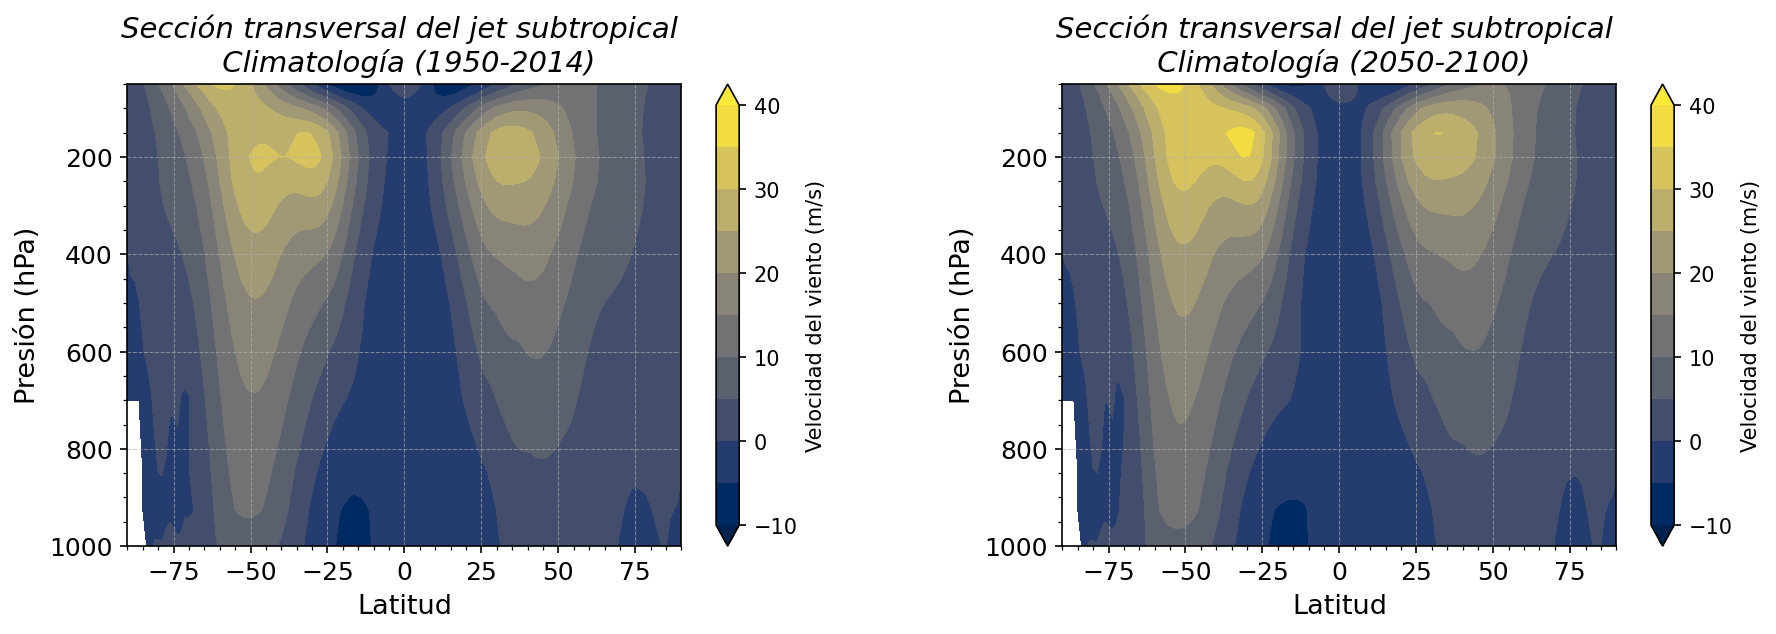

In [51]:
# Definir una función para convertir Pa a hPa
def pa_to_hpa(x, pos):
    return f'{int(x/100)}'
    
plt.figure(figsize=(14,4),dpi=150)
plt.subplots_adjust(wspace=0.35)

# escenario historical ---------------------------------------------------------------------------------------------------------------------------------------------------
plt.subplot(1,2,1)
plt.contourf(mil_a_50hPa_585.lat,mil_a_50hPa_585.plev,por_año,levels=np.arange(-10,41,5),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('Sección transversal del jet subtropical \n Climatología (1950-2014)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))
plt.savefig('Figura7.png')

# escenario ssp585 ------------------------------------------------------------------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
plt.contourf(mil_a_50hPa_585.lat,mil_a_50hPa_585.plev,por_año_585,levels=np.arange(-10,41,5),cmap='cividis',extend='both')
plt.gca().invert_yaxis()
plt.colorbar(label='Velocidad del viento (m/s)')
plt.title('Sección transversal del jet subtropical \n Climatología (2050-2100)',fontstyle='italic',fontsize=14)
plt.xlabel('Latitud',fontsize=13)
plt.ylabel('Presión (hPa)',fontsize=13)
plt.minorticks_on()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--',alpha=0.66,linewidth=0.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))
plt.savefig('Figura8.png')


plt.show()

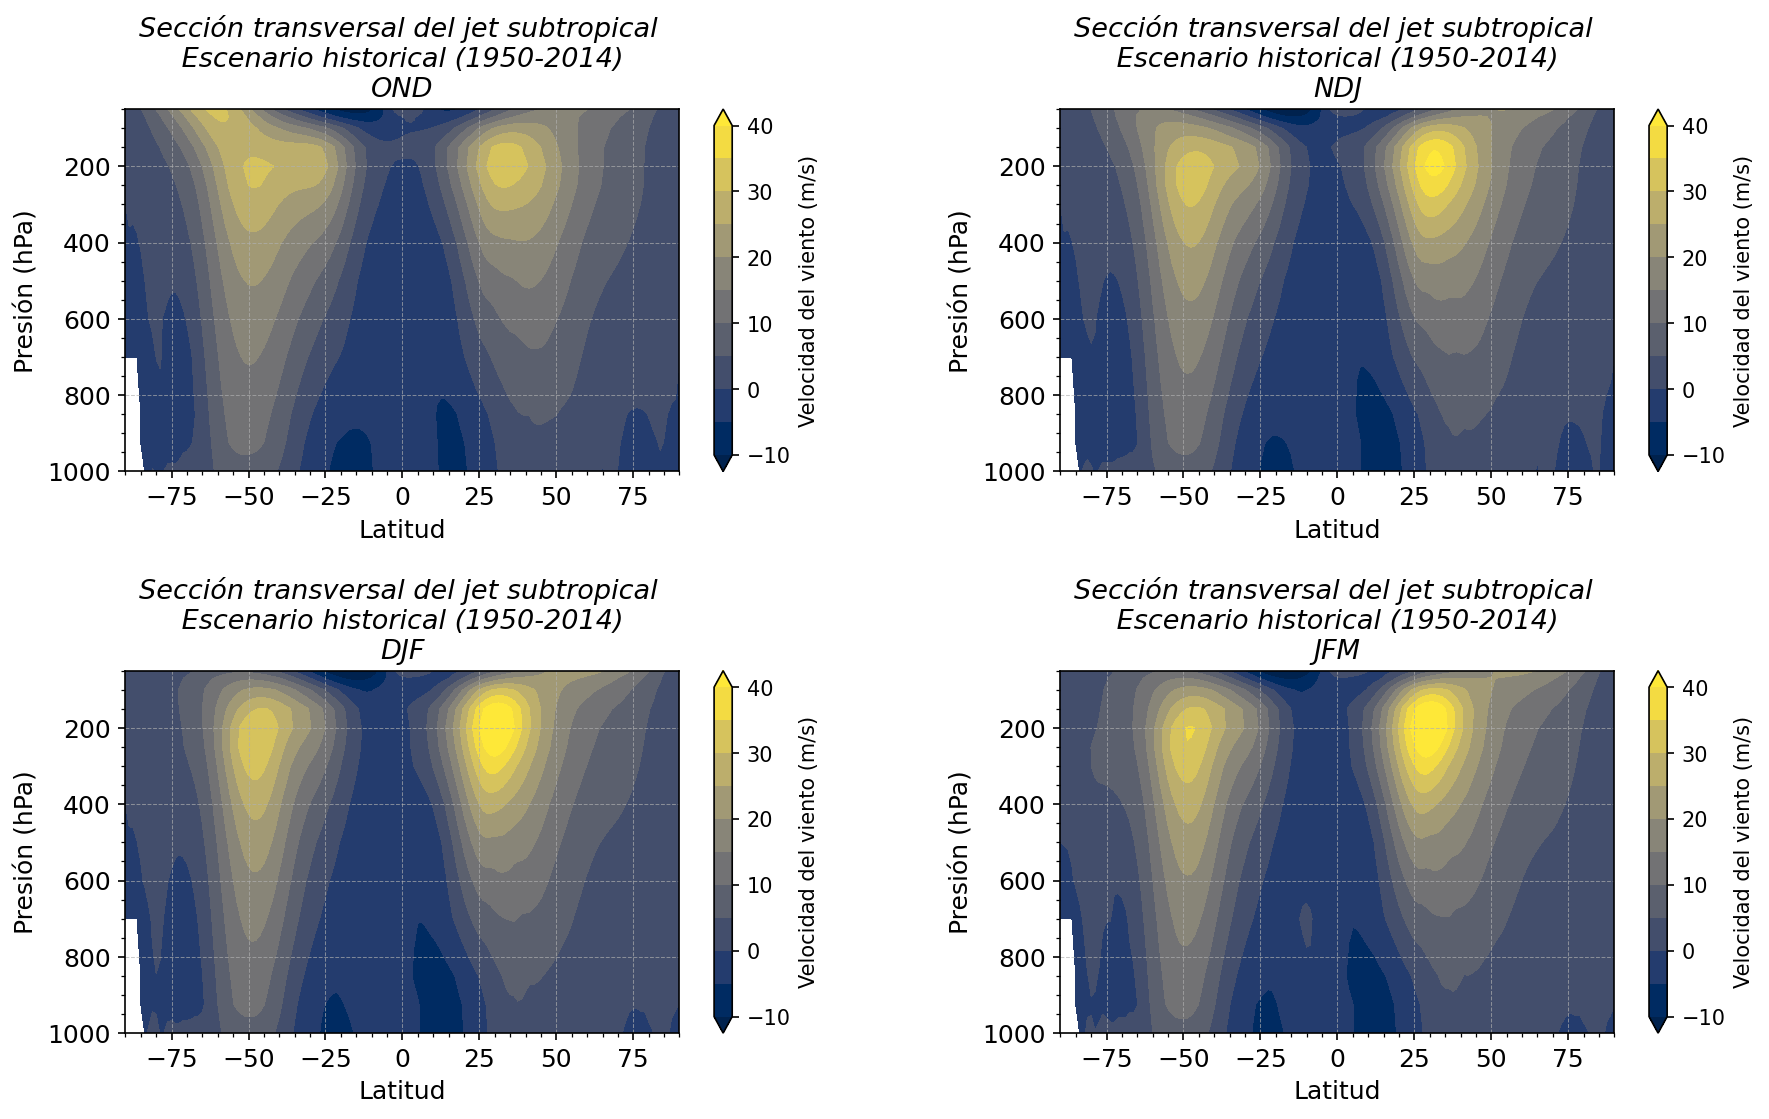

In [54]:
datasets = [OND, NDJ, DJF, JFM]
plt.figure(figsize=(14, 8), dpi=150)
plt.subplots_adjust(wspace=0.35, hspace=0.55)

meses = ['OND', 'NDJ', 'DJF', 'JFM']

for i, (data, season) in enumerate(zip(datasets, meses), start=1):
    plt.subplot(2, 2, i)
    contour = plt.contourf(mil_a_50hPa.lat, mil_a_50hPa.plev, data, levels=np.arange(-10, 41, 5), cmap='cividis', extend='both')
    plt.gca().invert_yaxis()
    plt.colorbar(contour, label='Velocidad del viento (m/s)')
    plt.title(f'Sección transversal del jet subtropical \n Escenario historical (1950-2014) \n{season}',fontstyle='italic',fontsize=13)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Latitud',fontsize=12)
    plt.ylabel('Presión (hPa)',fontsize=12)
    plt.grid(linestyle='--', alpha=0.66, linewidth=0.5)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))
    plt.savefig(f"figura_{season}.png")

plt.show()


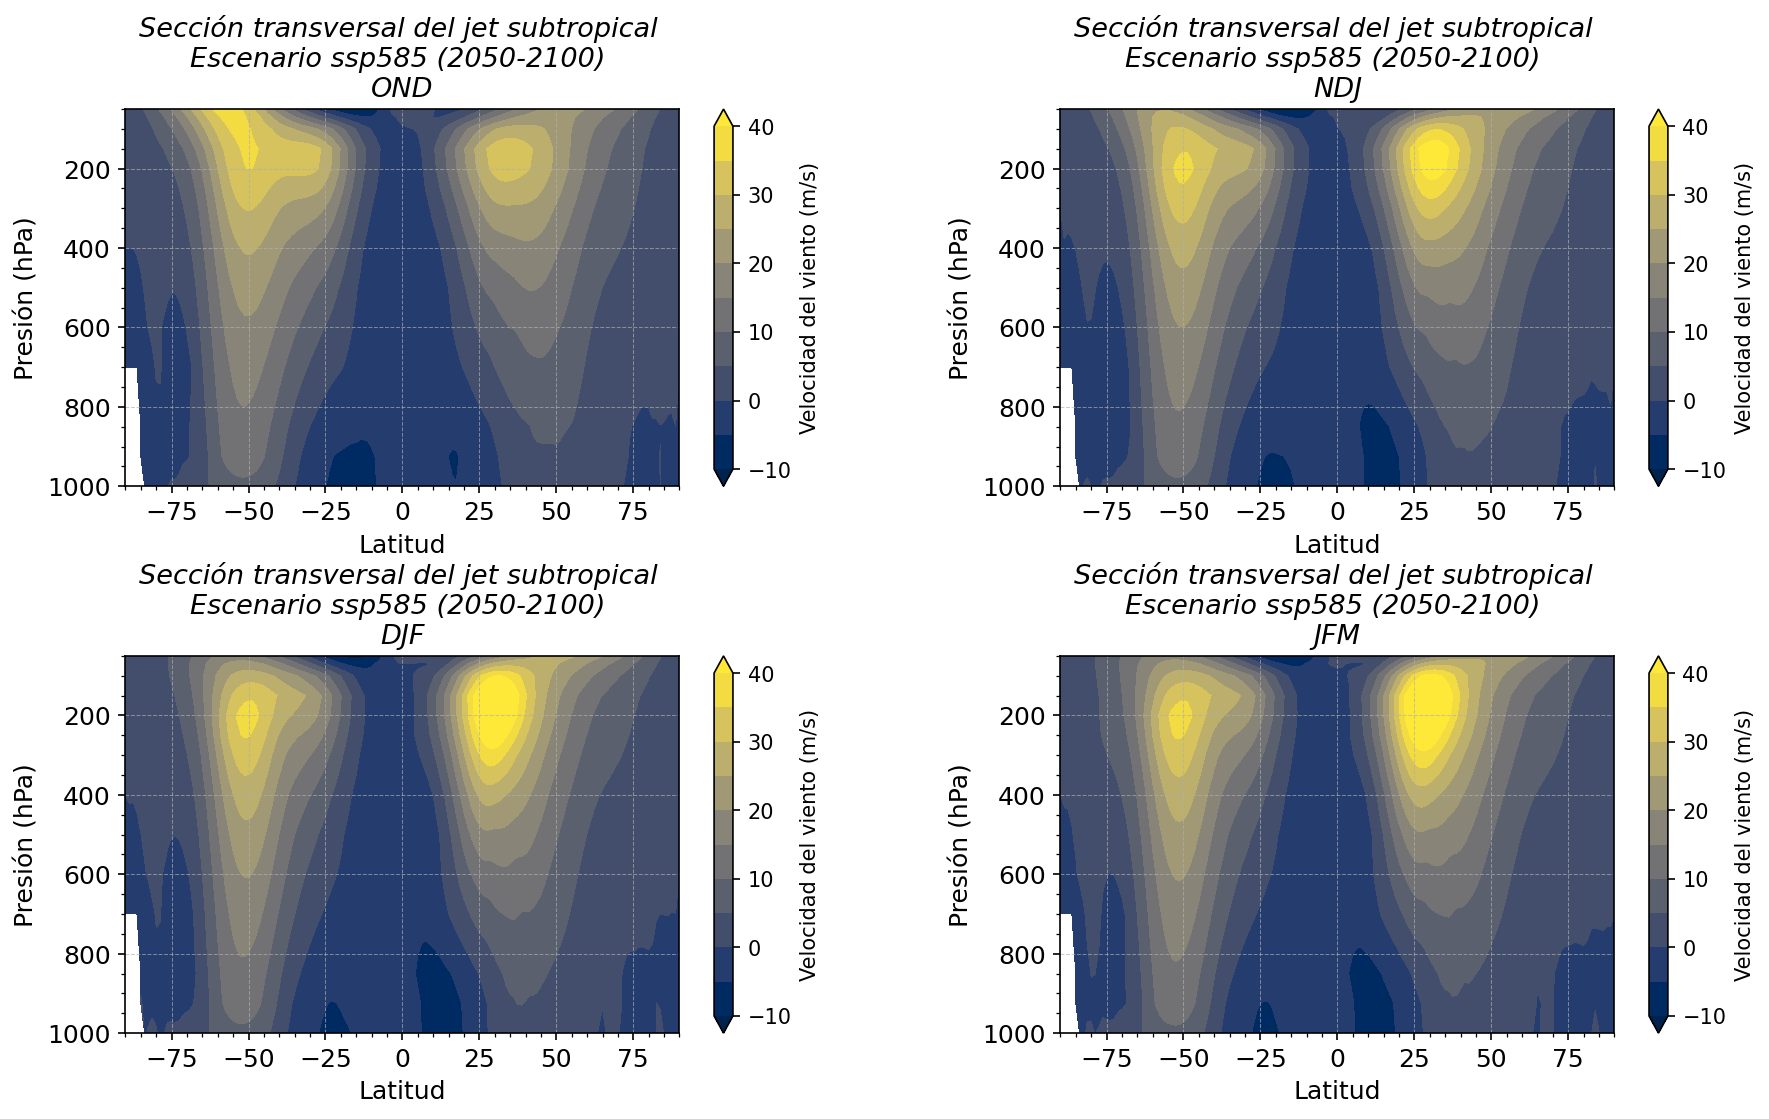

In [57]:
datasets5 = [OND5, NDJ5, DJF5, JFM5]
plt.figure(figsize=(14, 8), dpi=150)
plt.subplots_adjust(wspace=0.35, hspace=0.45)

meses5 = ['OND', 'NDJ', 'DJF', 'JFM']

for i, (data, season) in enumerate(zip(datasets5, meses5), start=1):
    plt.subplot(2, 2, i)
    contour = plt.contourf(mil_a_50hPa.lat, mil_a_50hPa.plev, data, levels=np.arange(-10, 41, 5), cmap='cividis', extend='both')
    plt.gca().invert_yaxis()
    plt.colorbar(contour, label='Velocidad del viento (m/s)')
    plt.title(f'Sección transversal del jet subtropical \nEscenario ssp585 (2050-2100) \n{season}',fontstyle='italic',fontsize=13)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Latitud',fontsize=12)
    plt.ylabel('Presión (hPa)',fontsize=12)
    plt.grid(linestyle='--', alpha=0.66, linewidth=0.5)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(pa_to_hpa))
    plt.savefig(f"figuras_{season}.png")
plt.show()